In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

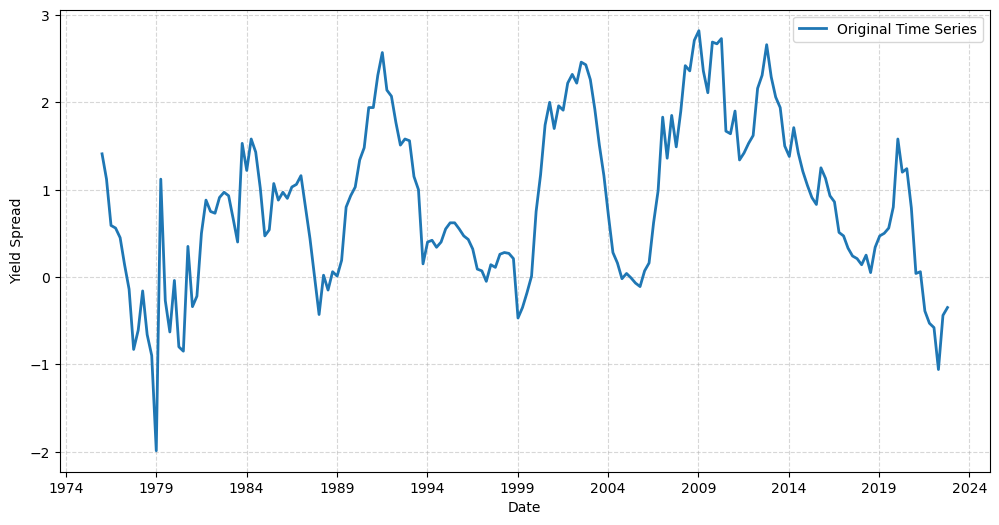

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Ryan Matthew\Desktop\ATSA\recession_predictors.csv")
df = df[['DATE', 'YS']]
df.set_index('DATE', inplace=True)
df.index = pd.to_datetime(df.index)  

plt.figure(figsize=(12, 6))
plt.plot(df, label='Original Time Series', color='tab:blue', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Yield Spread')

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(5 * 365))  
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))  

plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [17]:
from statsmodels.tsa.stattools import adfuller
adftest=adfuller(df)
print(adftest[1])

0.0039995770200833905


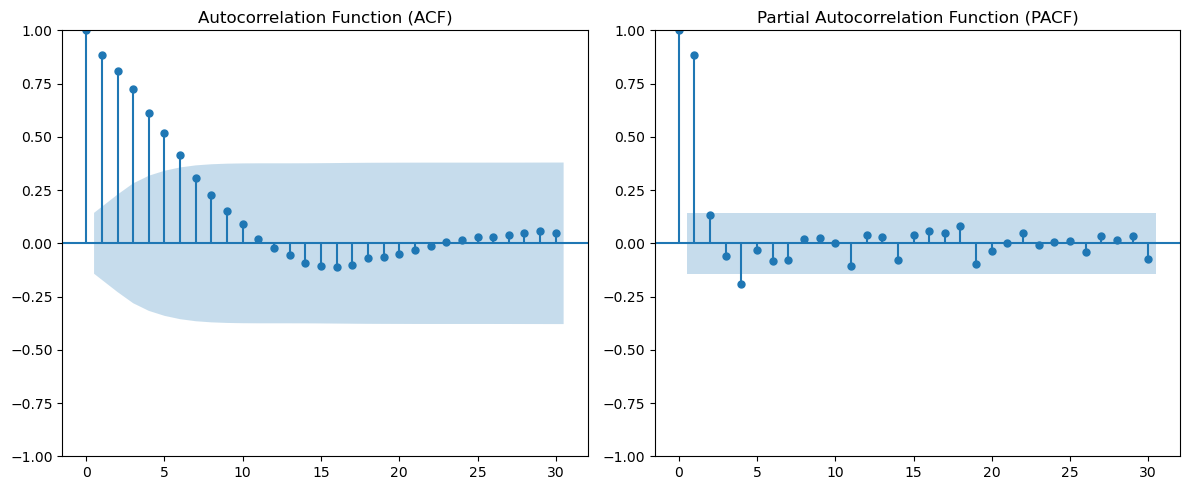

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Plot ACF and PACF
plt.figure(figsize=(12, 5))

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(df['YS'], lags=30, ax=plt.gca())
plt.title("Autocorrelation Function (ACF)")

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(df['YS'], lags=30, ax=plt.gca(), method='ywm')
plt.title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()


In [19]:
import itertools
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')
import itertools
p=range(0,6)
d=range(0,1)
q=range(0,6)
pdq_combination=list(itertools.product(p,d,q))

rmse=[]
order=[]
for i, pdq in enumerate(pdq_combination):
   
    model = ARIMA(df, order=pdq).fit()
    pred = model.predict(start=0, end=(len(df)-1))
    error = np.sqrt(mean_squared_error(df, pred))
    order.append(pdq)
    rmse.append(error)

results=pd.DataFrame({'order':order,'rmse':rmse}).sort_values(by='rmse', ascending=True)
results.head()

,order,rmse
28,"(4, 0, 4)",0.405346
35,"(5, 0, 5)",0.405813
29,"(4, 0, 5)",0.405851
33,"(5, 0, 3)",0.406377
34,"(5, 0, 4)",0.406462


In [20]:
from statsmodels.stats.diagnostic import acorr_ljungbox
model=ARIMA(df,order=(4, 0, 4)).fit()
ljung_box_test = acorr_ljungbox(model.resid, lags=[10], return_df=True)
ljung_box_test

,lb_stat,lb_pvalue
10,3.840408,0.954259


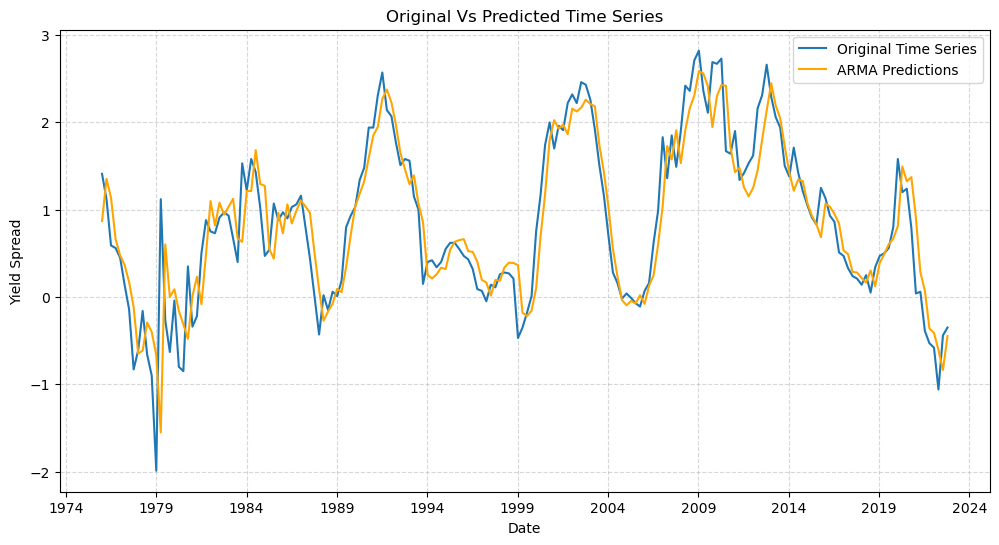

In [21]:
pred=model.predict(start=0,end=(len(df)-1))

plt.figure(figsize=(12, 6))
plt.plot(df, label='Original Time Series')
plt.plot(df.index, pred, color='orange', label='ARMA Predictions')
plt.xlabel('Date')
plt.ylabel('Yield Spread')
plt.title('Original Vs Predicted Time Series')

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(5 * 365))  
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))  

plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

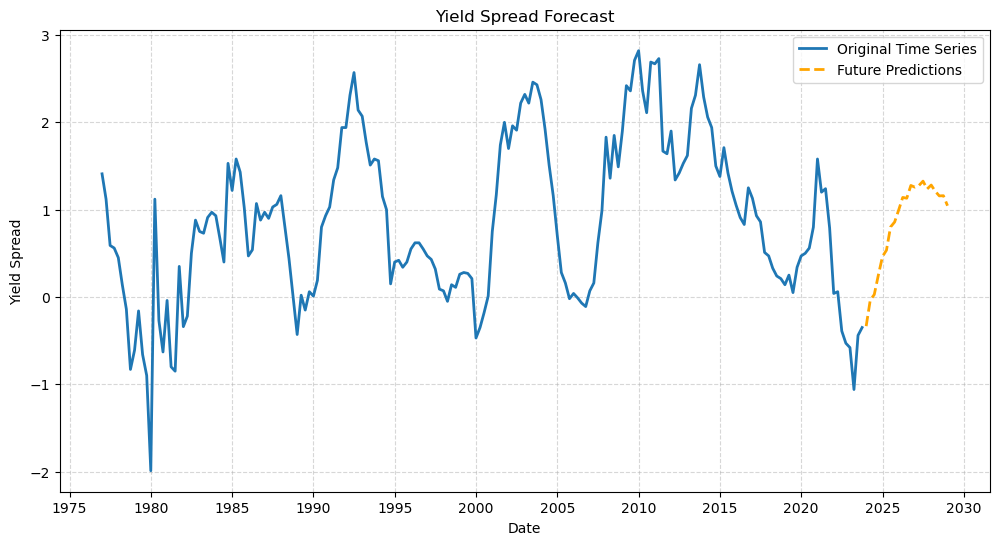

In [22]:
future_pred = model.predict(start=len(df), end=len(df)+20)

plt.figure(figsize=(12, 6))
plt.plot(df, label="Original Time Series", color='tab:blue', linewidth=2)
plt.plot(pd.date_range(df.index[-1], periods=21, freq='Q'), future_pred, label="Future Predictions", color="orange", linestyle="--", linewidth=2)

plt.xlabel("Date")
plt.ylabel("Yield Spread")
plt.title("Yield Spread Forecast")

plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(5))  
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y')) 

plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [72]:
df=pd.DataFrame(future_pred)
df.to_csv('YS_Forecast.csv')